# Argo Southern Ocean

This notebook will load all Argo data south of $30^\circ S$ and make simple plots of T, S data.

In [211]:
import xarray as xr

In [21]:
import xarray as xr
import flox.xarray as fx
import numpy as np
import pandas as pd
import cmocean.cm as cmo
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [22]:
'/swot/SUM05/jpope/'

'/swot/SUM05/jpope/'

In [5]:
ds_globe = xr.open_dataset('/swot/SUM05/amf2288/sync-boxes/new_test.nc', chunks={'N_PROF':10000})

In [8]:
unique_prof = np.arange(len(ds_globe['N_PROF']))
ds_globe = ds_globe.assign_coords(N_PROF=('N_PROF', unique_prof))

In [120]:
ds_so = ds_globe.where(ds_globe.LATITUDE.compute()<-30, drop=True)

In [121]:
ds_so

<xarray.Dataset>
Dimensions:            (N_PROF: 656862, PRES_INTERPOLATED: 1001)
Coordinates:
  * PRES_INTERPOLATED  (PRES_INTERPOLATED) int64 0 2 4 6 ... 1994 1996 1998 2000
  * N_PROF             (N_PROF) int64 5879 5880 5881 ... 2550893 2550894 2550895
    TIME               (N_PROF) datetime64[ns] 2006-04-15T13:51:43 ... 2025-0...
    LATITUDE           (N_PROF) float64 -42.64 -42.65 -42.76 ... -42.19 -40.33
    LONGITUDE          (N_PROF) float64 -4.772 -4.579 -4.508 ... -142.5 -141.7
Data variables:
    CT                 (N_PROF, PRES_INTERPOLATED) float64 dask.array<chunksize=(3631, 1001), meta=np.ndarray>
    CYCLE_NUMBER       (N_PROF) float64 dask.array<chunksize=(3631,), meta=np.ndarray>
    DATA_MODE          (N_PROF) object dask.array<chunksize=(3631,), meta=np.ndarray>
    DIRECTION          (N_PROF) object dask.array<chunksize=(3631,), meta=np.ndarray>
    PLATFORM_NUMBER    (N_PROF) float64 dask.array<chunksize=(3631,), meta=np.ndarray>
    PRES               (N_PROF, PRES_INTERPOLATED) float32 dask.array<chunksize=(3631, 1001), meta=np.ndarray>
    PSAL               (N_PROF, PRES_INTERPOLATED) float32 dask.array<chunksize=(3631, 1001), meta=np.ndarray>
    SA                 (N_PROF, PRES_INTERPOLATED) float64 dask.array<chunksize=(3631, 1001), meta=np.ndarray>
    SIG0               (N_PROF, PRES_INTERPOLATED) float64 dask.array<chunksize=(3631, 1001), meta=np.ndarray>
    TEMP               (N_PROF, PRES_INTERPOLATED) float32 dask.array<chunksize=(3631, 1001), meta=np.ndarray>
    sample_rate        (N_PROF, PRES_INTERPOLATED) float32 dask.array<chunksize=(3631, 1001), meta=np.ndarray>
    SPICE              (N_PROF, PRES_INTERPOLATED) float64 dask.array<chunksize=(3631, 1001), meta=np.ndarray>
Attributes:
    DATA_ID:              ARGO
    DOI:                  http://doi.org/10.17882/42182
    Fetched_from:         https://data-argo.ifremer.fr
    Fetched_by:           amf2288
    Fetched_date:         2025/03/11
    Fetched_constraints:  [x=0.00/5.00; y=40.00/45.00; z=0.0/2002.0]
    Fetched_uri:          https://data-argo.ifremer.fr/dac/coriolis/6903068/6...
    Valid uris:           ['https://data-argo.ifremer.fr/dac/coriolis/6903068...
    All uris:             ['https://data-argo.ifremer.fr/dac/coriolis/6903068...
    Processing_history:   [PRES,TEMP,PSAL] real-time and adjusted/delayed var...

In [328]:
#selecting a profile to visualize
prof = ds_so.isel(N_PROF=11111)

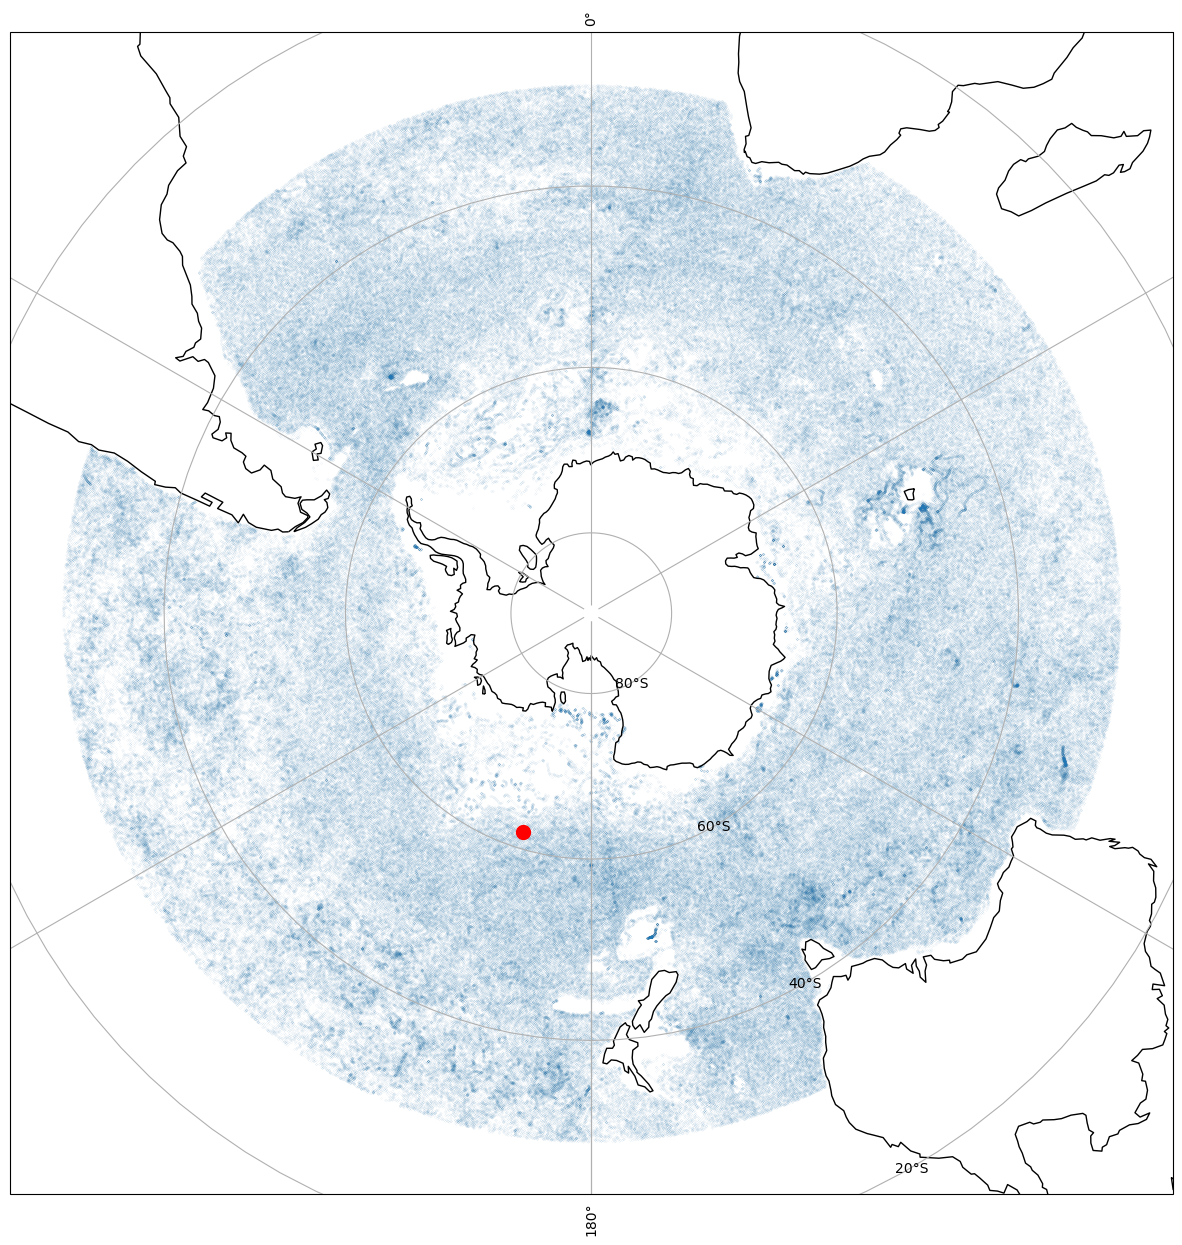

In [329]:
fig = plt.figure(figsize=(15, 20))
ax = plt.axes(projection=ccrs.SouthPolarStereo())
ax.coastlines()
ax.gridlines(draw_labels=True)
ax.scatter(ds_so.LONGITUDE,ds_so.LATITUDE,transform=ccrs.PlateCarree(),color='tab:blue',s=0.001)
ax.scatter(prof.LONGITUDE,prof.LATITUDE,transform=ccrs.PlateCarree(),color='r',s=100)

Profile lat: -61.92239
Profile lon: -162.60721
Profile date: 2022-03-01T05:34:43.999999744


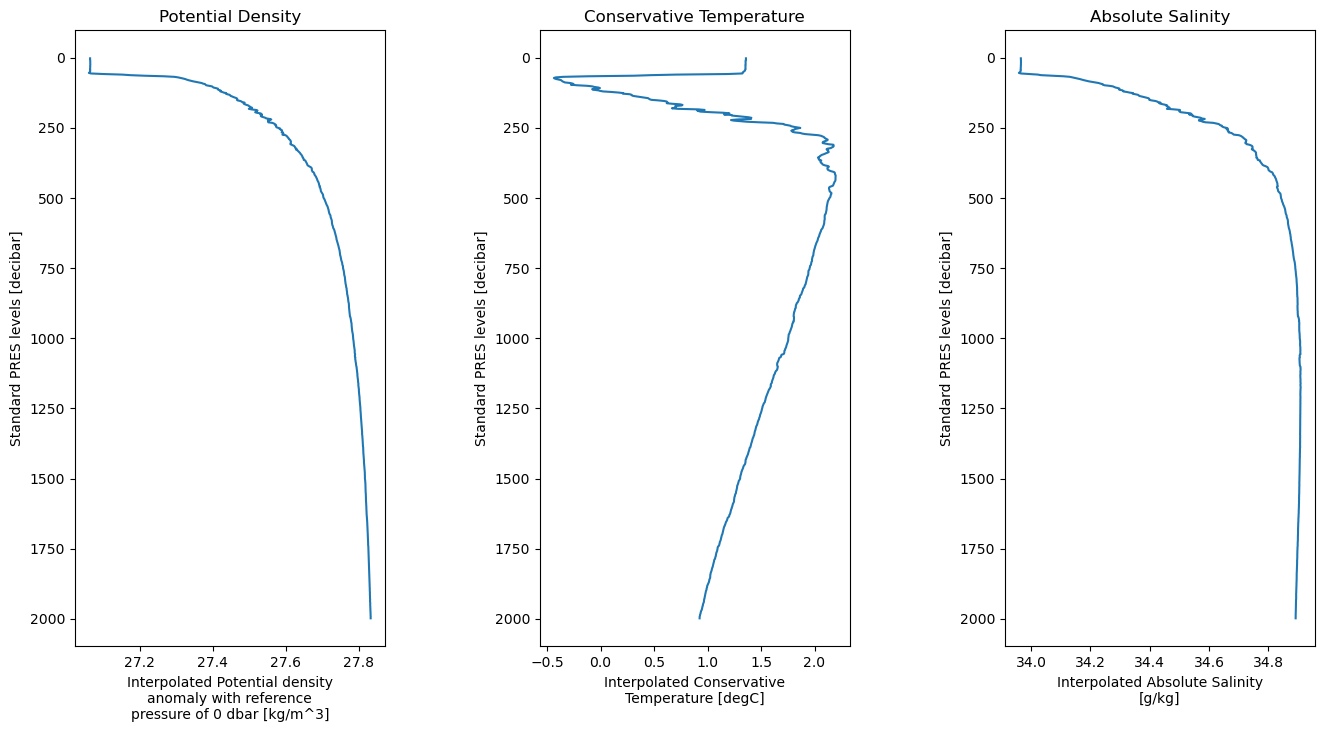

In [330]:
plt.figure(figsize=(16,8))

prof = ds_so.isel(N_PROF=11111)

plt.subplot(131)
prof.SIG0.plot(y='PRES_INTERPOLATED')
plt.gca().invert_yaxis()
plt.title('Potential Density')

plt.subplot(132)
prof.CT.plot(y='PRES_INTERPOLATED')
plt.gca().invert_yaxis()
plt.title('Conservative Temperature')

plt.subplot(133)
prof.SA.plot(y='PRES_INTERPOLATED')
plt.gca().invert_yaxis()
plt.title('Absolute Salinity')

plt.subplots_adjust(wspace=0.5)

print('Profile lat: {}'.format(prof.LATITUDE.values))
print('Profile lon: {}'.format(prof.LONGITUDE.values))
print('Profile date: {}'.format(prof.TIME.values))

In [332]:
prof = ds_so.isel(N_PROF = 11111)
prof.CT.sel(PRES_INTERPOLATED=1800, method = 'nearest').compute().item()

1.0565732828588152

In [333]:
def get_ild(prof):
    temp_10m = prof.CT.sel(PRES_INTERPOLATED = 10, method = 'nearest')
    if temp_10m.notnull():
        ref_temp = temp_10m
    else:
        ref_temp = prof.CT.sel(PRES_INTERPOLATED = 20, method = 'nearest')
    return ref_temp

get_ild(prof).compute().item()

1.358221643870308

In [277]:
import matplotlib.pyplot as plt

# Extract profile
prof = ds_so.isel(N_PROF=11111)
y = prof.PRES_INTERPOLATED

# Base axis (CT)
fig, ax_ct = plt.subplots(figsize=(6, 10))
ax_ct.invert_yaxis()
ax_ct.plot(prof.CT, y, color='tab:green')
ax_ct.set_xlabel("Conservative Temp (°C)", color='tab:green')
ax_ct.set_ylabel("Pressure (dbar)")
ax_ct.tick_params(axis='x', labelcolor='tab:green')

# Top axis (SIG0)
ax_sig0 = ax_ct.twiny()
ax_sig0.plot(prof.SIG0, y, color='tab:blue')
ax_sig0.set_xlabel("Potential Density (kg/m³)", color='tab:blue')
ax_sig0.tick_params(axis='x', labelcolor='tab:blue')

# Create third axis for SA by shifting CT’s axis down slightly
ax_sa = ax_ct.twiny()
# Move it below original CT axis
ax_sa.spines["top"].set_position(("axes", -0.15))  # Move downward
ax_sa.plot(prof.SA, y, color='tab:red')
ax_sa.set_xlabel("Absolute Salinity (g/kg)", color='tab:red')
ax_sa.tick_params(axis='x', labelcolor='tab:red')
ax_sa.xaxis.set_label_position('top')
ax_sa.xaxis.set_ticks_position('top')

# Avoid overlapping x-labels
ax_ct.xaxis.set_label_position('bottom')
ax_ct.xaxis.set_ticks_position('bottom')

# Title
plt.suptitle(
    'Profile at lat {:.2f}, lon {:.2f}, date {}'.format(
        prof.LATITUDE.values,
        prof.LONGITUDE.values,
        np.datetime_as_string(prof.TIME.values, unit='D')
    ),
    y=1.02
)

plt.tight_layout()
plt.show()


In [124]:
#selecting depth to visualize
depth = ds_so.sel(PRES_INTERPOLATED=0, method='nearest')

In [385]:
lon_bins = np.arange(-180,181,1)
lat_bins = np.arange(-90,-29,1)
lon_bins3 = np.arange(-180, 181, 3)
lat_bins3 = np.arange(-90, 91, 3)

In [246]:
def get_ds_binned(ds, lon_bins, lat_bins):
    """
    Bin an xarray Dataset by 3-degree latitude and longitude bins,
    replacing Interval dimensions with bin centers.
    
    Parameters:
        ds : xarray.Dataset
            The dataset to bin.
        lon_bins : array-like
            Bin edges for longitude (e.g. np.arange(-180, 181, 3))
        lat_bins : array-like
            Bin edges for latitude (e.g. np.arange(-90, 91, 3))
    
    Returns:
        xarray.Dataset
            Binned dataset with dimensions (PRES_INTERPOLATED, lon_c, lat_c)
    """

    # Step 1: Bin with fx.xarray_reduce using IntervalIndex
    ds_binned = fx.xarray_reduce(
        ds,
        'LONGITUDE',
        'LATITUDE',
        func='mean',
        expected_groups=(
            pd.IntervalIndex.from_breaks(lon_bins),
            pd.IntervalIndex.from_breaks(lat_bins),
        ),
        fill_value=np.nan,
        skipna=True
    )

    # Step 2: Create left, right, center arrays
    lon_l = np.array(lon_bins[:-1])
    lon_r = np.array(lon_bins[1:])
    lon_c = (lon_l + lon_r) / 2

    lat_l = np.array(lat_bins[:-1])
    lat_r = np.array(lat_bins[1:])
    lat_c = (lat_l + lat_r) / 2

    # Step 3: Replace Interval dims with center dims
    ds_binned = ds_binned.assign_coords({
        "lon_c": ("LONGITUDE", [iv.mid for iv in ds_binned['LONGITUDE'].values]),
        "lat_c": ("LATITUDE", [iv.mid for iv in ds_binned['LATITUDE'].values]),
        "lon_l": ("LONGITUDE", lon_l),
        "lon_r": ("LONGITUDE", lon_r),
        "lat_l": ("LATITUDE", lat_l),
        "lat_r": ("LATITUDE", lat_r),
    })

    ds_binned = ds_binned.swap_dims({"LONGITUDE": "lon_c", "LATITUDE": "lat_c"})

    # Optional: drop original Interval-valued variables
    # ds_binned = ds_binned.drop_vars(["LONGITUDE", "LATITUDE"])

    return ds_binned

In [387]:
ds_so_binned = get_ds_binned(ds_so, lon_bins, lat_bins)
ds_globe_binned_3 = get_ds_binned(ds_globe, lon_bins3, lat_bins3)

In [ ]:
# Seasonal Grouping

seasonal_groups = ds_so.groupby('TIME.season')

ds_so_binned_seasonal = {
    season: get_ds_binned(group, lon_bins, lat_bins)
    for season, group in seasonal_groups
}


In [ ]:
depth = 500
given_depth_seasonal = {
    season: ds.sel(PRES_INTERPOLATED=depth, method='nearest')[['SA']].compute()
    for season, ds in ds_so_binned_seasonal.items()
}


In [365]:
ordered_seasons = ["DJF", "MAM", "JJA", "SON"]
season_labels = {
    "DJF": "Summer",
    "MAM": "Autumn",
    "JJA": "Winter",
    "SON": "Spring"
}

/tmp/ipykernel_40931/3112110163.py:26: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


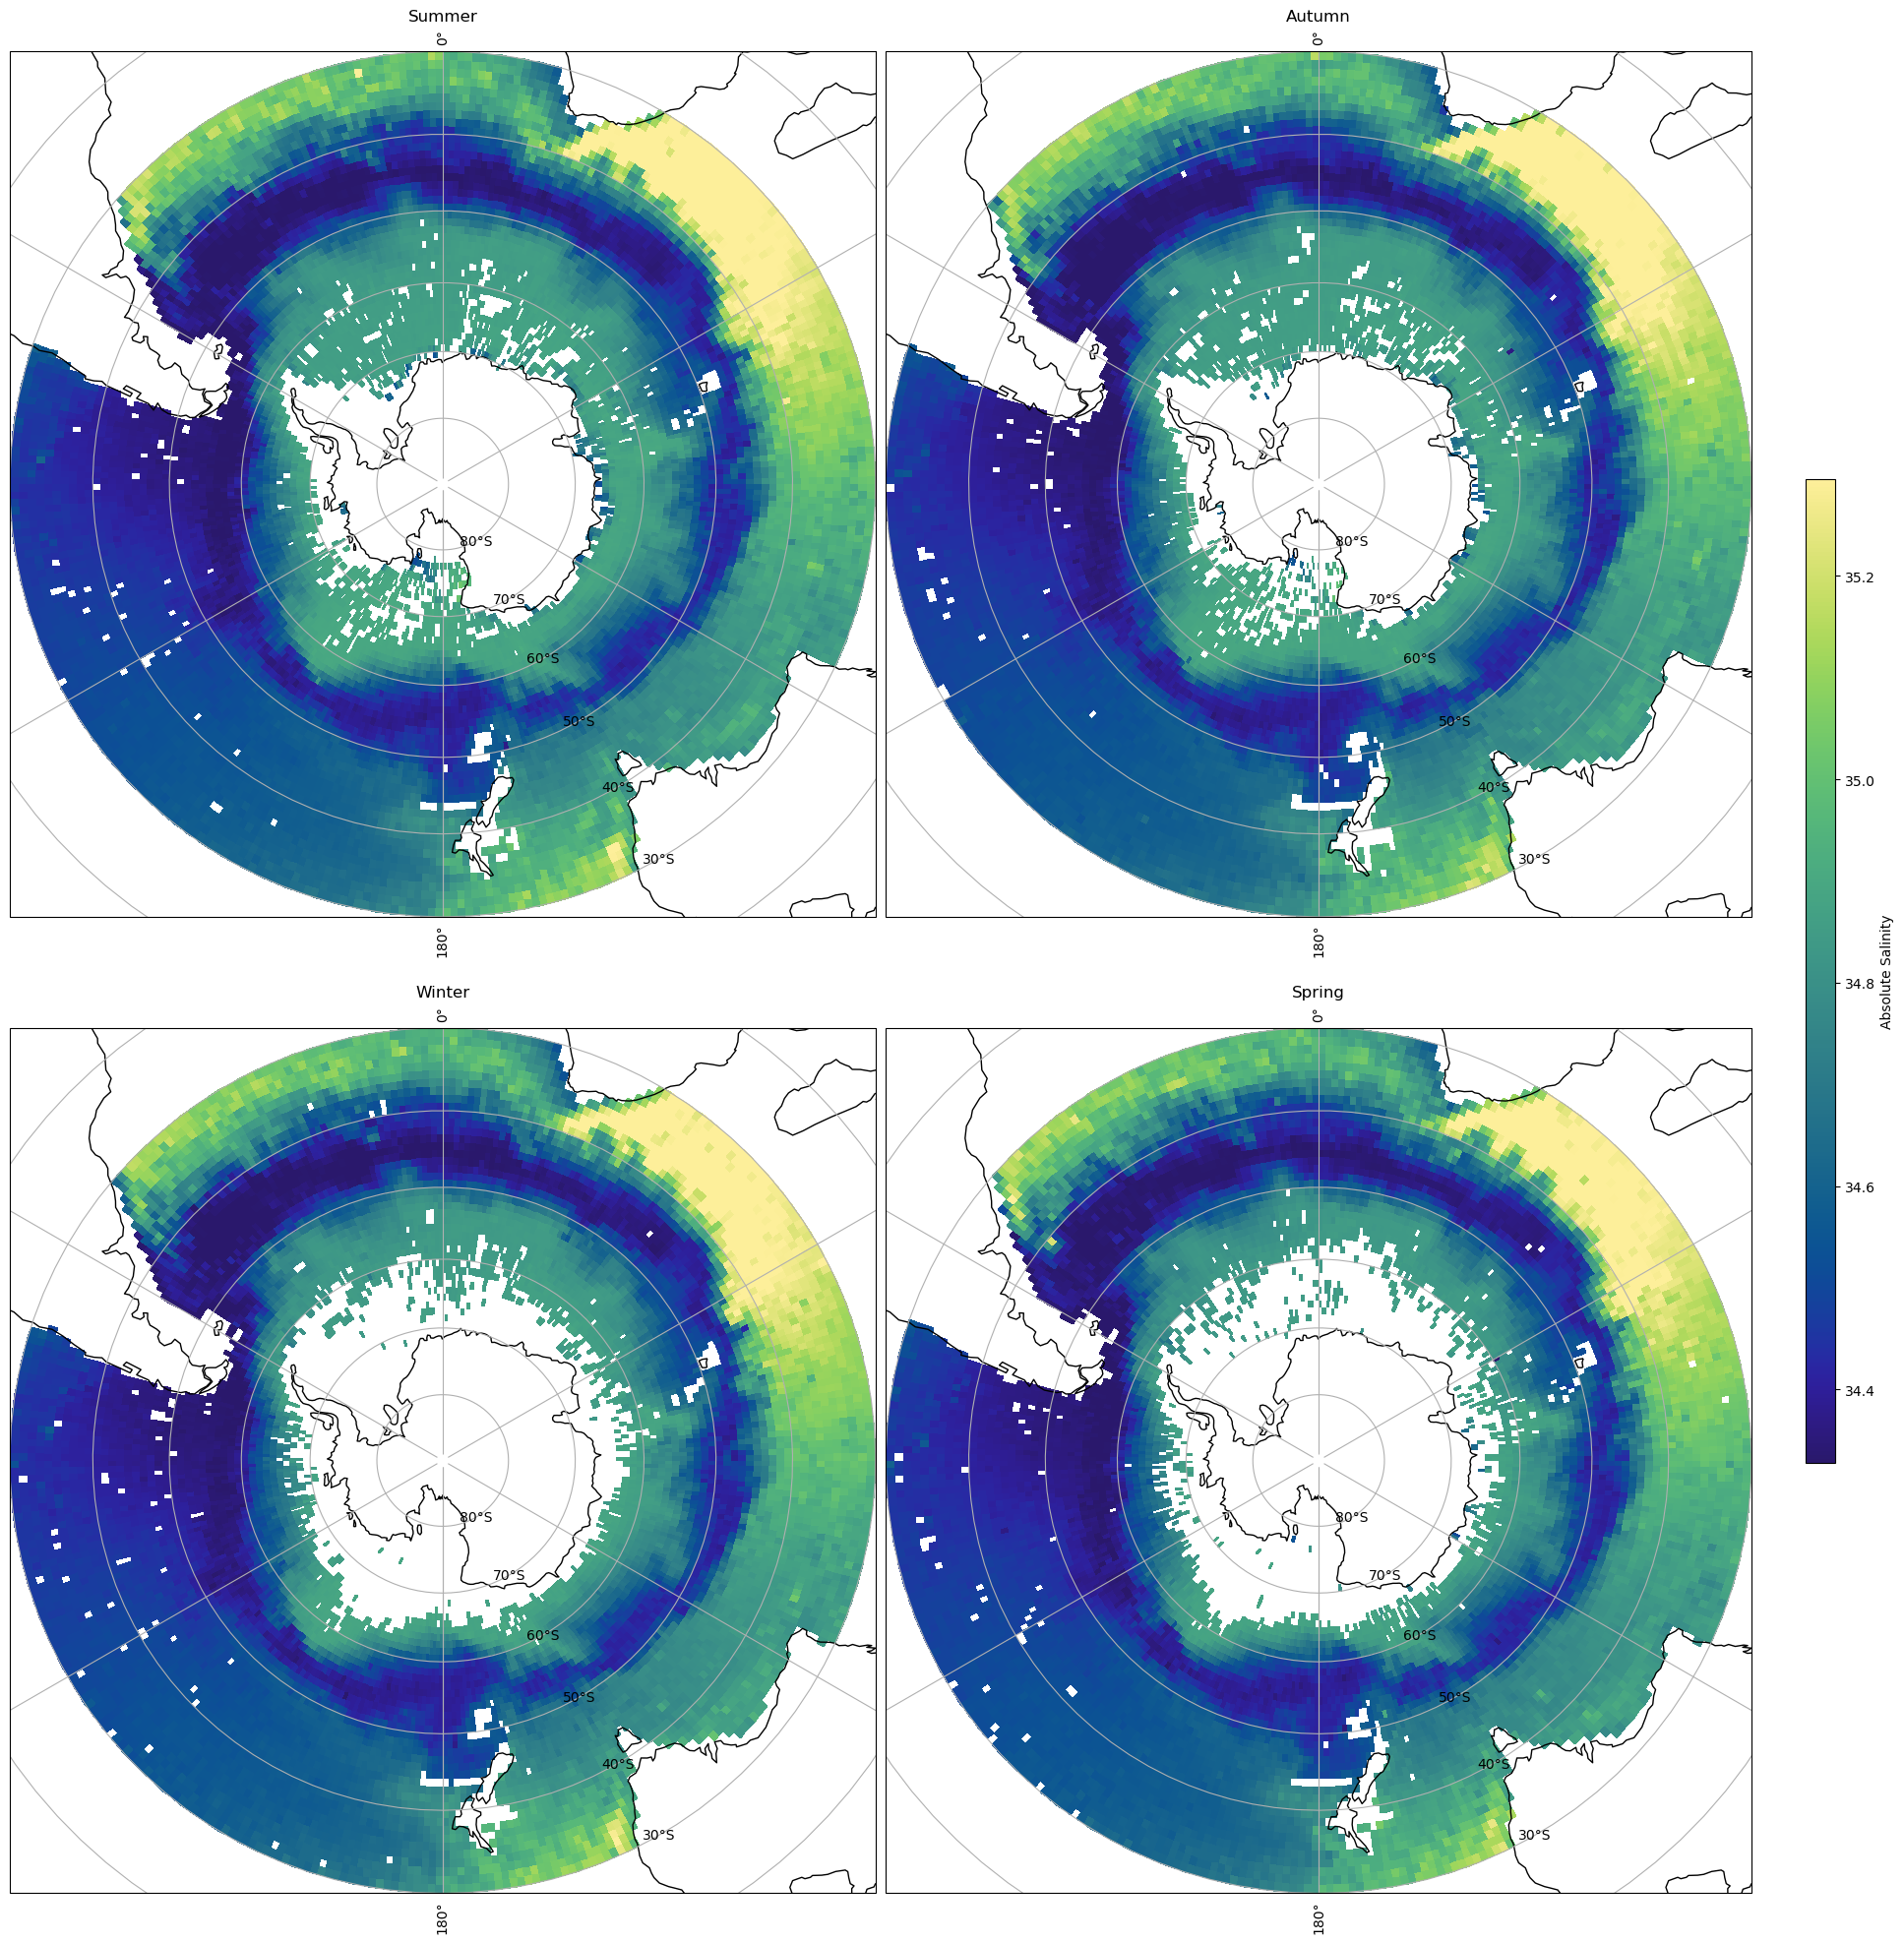

<Figure size 640x480 with 0 Axes>

In [377]:
fig, axs = plt.subplots(2, 2, figsize=(20, 20), subplot_kw={'projection': ccrs.SouthPolarStereo()})
axs = axs.ravel()

for i, season in enumerate(ordered_seasons):
    ds = given_depth_seasonal[season]
    ax = axs[i]
    ax.coastlines()
    ax.gridlines(draw_labels=True)

    ds.SA.plot(
        ax=ax,
        x='lon_c',
        y='lat_c',
        transform=ccrs.PlateCarree(),
        robust=True,
        infer_intervals=True,
        cmap=cmo.haline,
        add_colorbar=False
    )
    ax.set_title(season_labels[season])

# Shared colorbar
cbar_ax = fig.add_axes([0.92, 0.25, 0.015, 0.5])
plt.colorbar(axs[0].collections[0], cax=cbar_ax, label="Absolute Salinity")

plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.show()
# plt.savefig("seasonal_500m_salinity.png", dpi=300, bbox_inches='tight')

In [ ]:
given_depth = ds_so_binned.sel(PRES_INTERPOLATED = 20, method = 'nearest')

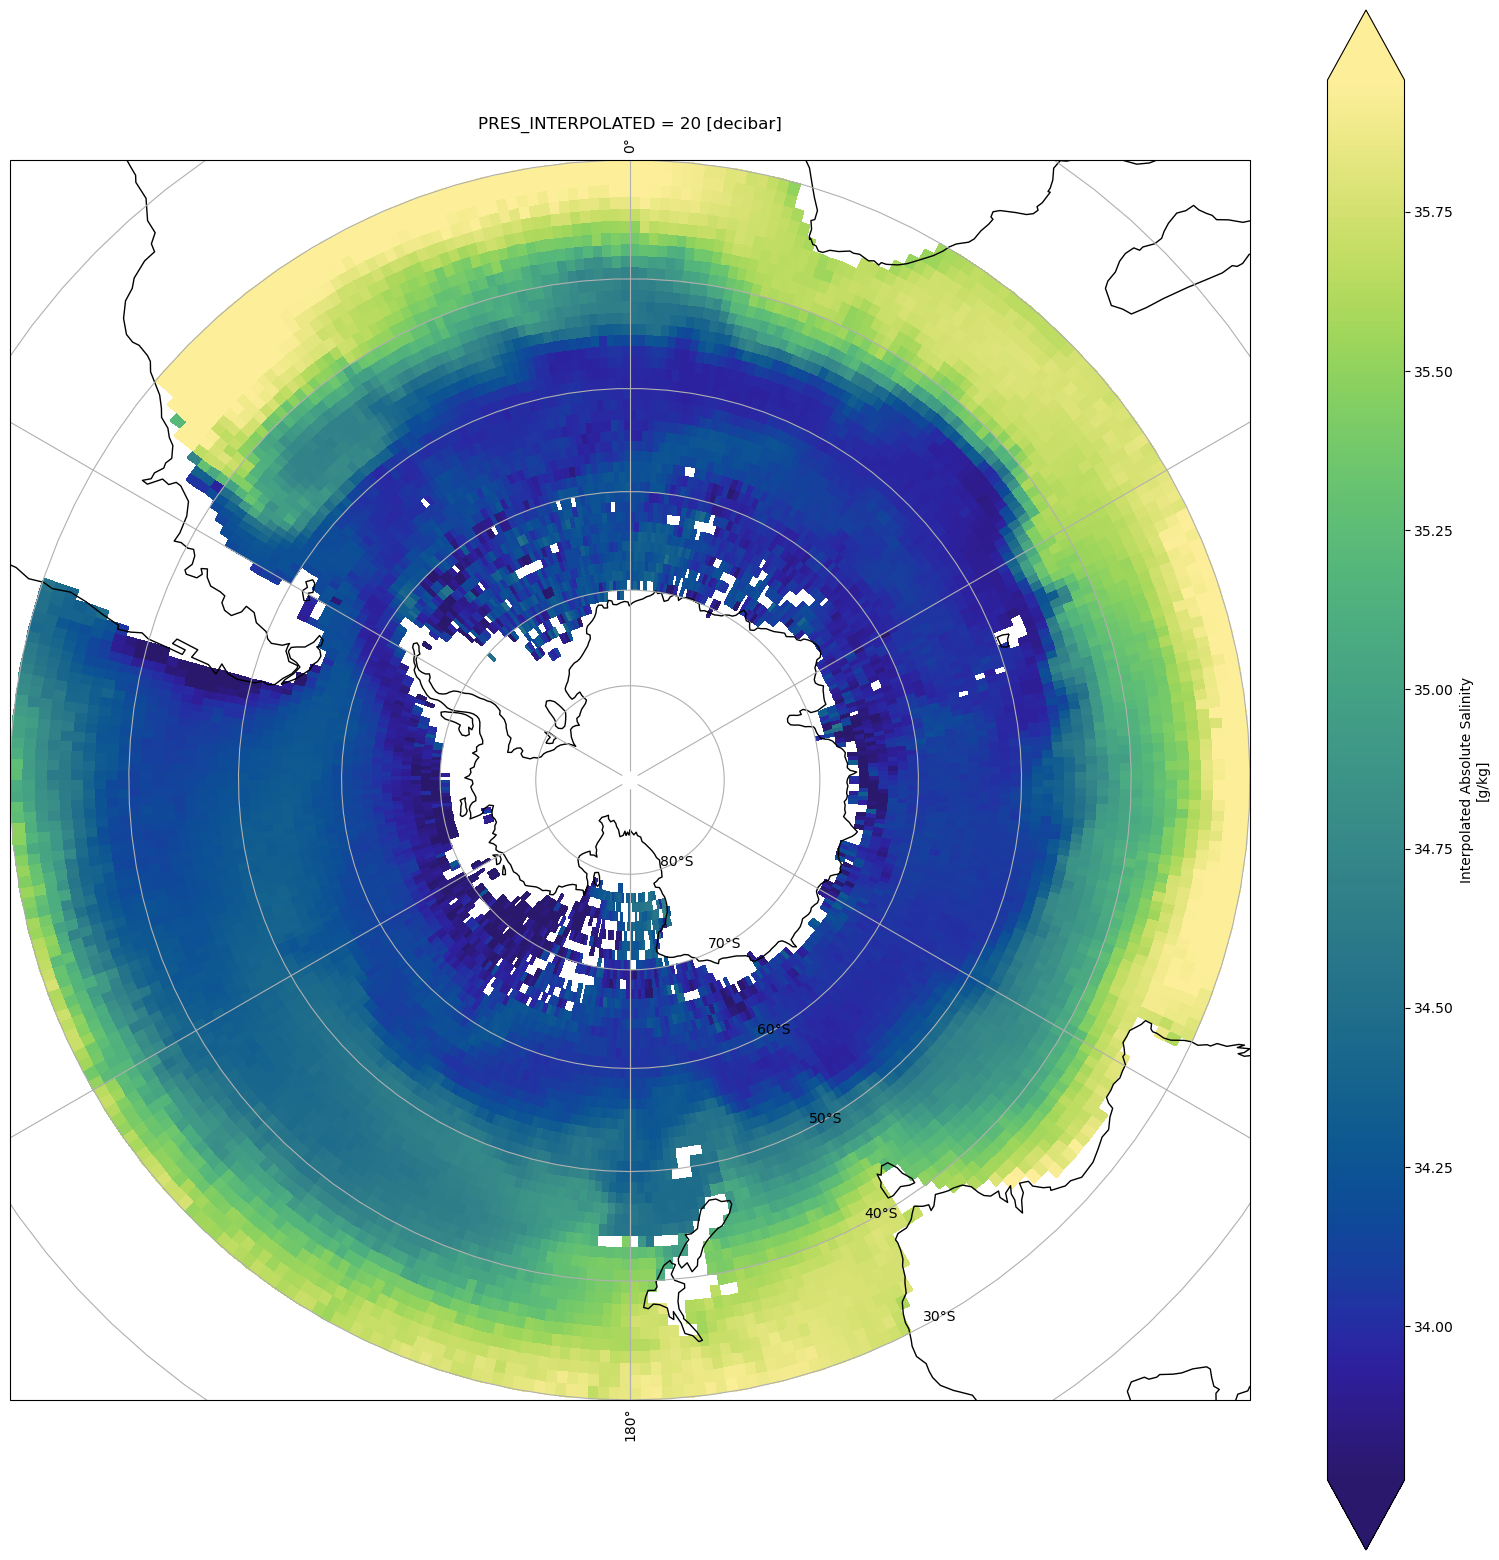

In [378]:
fig = plt.figure(figsize=(20,20))
ax = plt.axes(projection=ccrs.SouthPolarStereo())
ax.coastlines()
ax.gridlines(draw_labels = True)
given_depth.SA.plot(x = 'lon_c', y ='lat_c', transform = ccrs.PlateCarree(), robust = True, infer_intervals = True, cmap = cmo.haline)

In [257]:
global_lat_bins = np.arange(-90,91,1)

In [391]:
ds_globe_binned = get_ds_binned(ds_globe, lon_bins, global_lat_bins)

In [392]:
atlantic_xsection = ds_globe_binned_3.sel(lon_c=-30, method='nearest')
section_data = atlantic_xsection[['SA', 'SIG0', 'CT']].load()

In [398]:
atlantic_data = section_data

In [400]:
atlantic_data.PRES_INTERPOLATED

<xarray.DataArray 'PRES_INTERPOLATED' (PRES_INTERPOLATED: 1001)>
array([   0,    2,    4, ..., 1996, 1998, 2000])
Coordinates:
  * PRES_INTERPOLATED  (PRES_INTERPOLATED) int64 0 2 4 6 ... 1994 1996 1998 2000
    LONGITUDE          object (-30, -27]
    lon_c              float64 -28.5
    lon_l              int64 -30
    lon_r              int64 -27
Attributes:
    long_name:       Standard PRES levels
    standard_name:   sea_water_pressure
    units:           decibar
    valid_min:       0.0
    valid_max:       12000.0
    C_format:        %7.1f
    FORTRAN_format:  F7.1
    resolution:      1.0
    axis:            Z
    casted:          1

In [408]:
plt.figure(figsize=(15,6))
atlantic_data.SA.plot(
    x = 'lat_c',
    y = 'PRES_INTERPOLATED',
    yincrease = False,
    cmap = cmo.haline,
    robust = True)

<xarray.DataArray 'SA' (PRES_INTERPOLATED: 1001, lat_c: 60)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * PRES_INTERPOLATED  (PRES_INTERPOLATED) int64 0 2 4 6 ... 1994 1996 1998 2000
    LONGITUDE          object (-30, -27]
    LATITUDE           (lat_c) object (-90, -87] (-87, -84] ... (87, 90]
    lon_c              float64 -28.5
  * lat_c              (lat_c) float64 -88.5 -85.5 -82.5 ... 82.5 85.5 88.5
    lon_l              int64 -30
    lon_r              int64 -27
    lat_l              (lat_c) int64 -90 -87 -84 -81 -78 -75 ... 75 78 81 84 87
    lat_r              (lat_c) int64 -87 -84 -81 -78 -75 -72 ... 78 81 84 87 90
Attributes:
    long_name:      Interpolated Absolute Salinity
    standard_name:  sea_water_absolute_salinity
    unit:           g/kg
    casted:         1

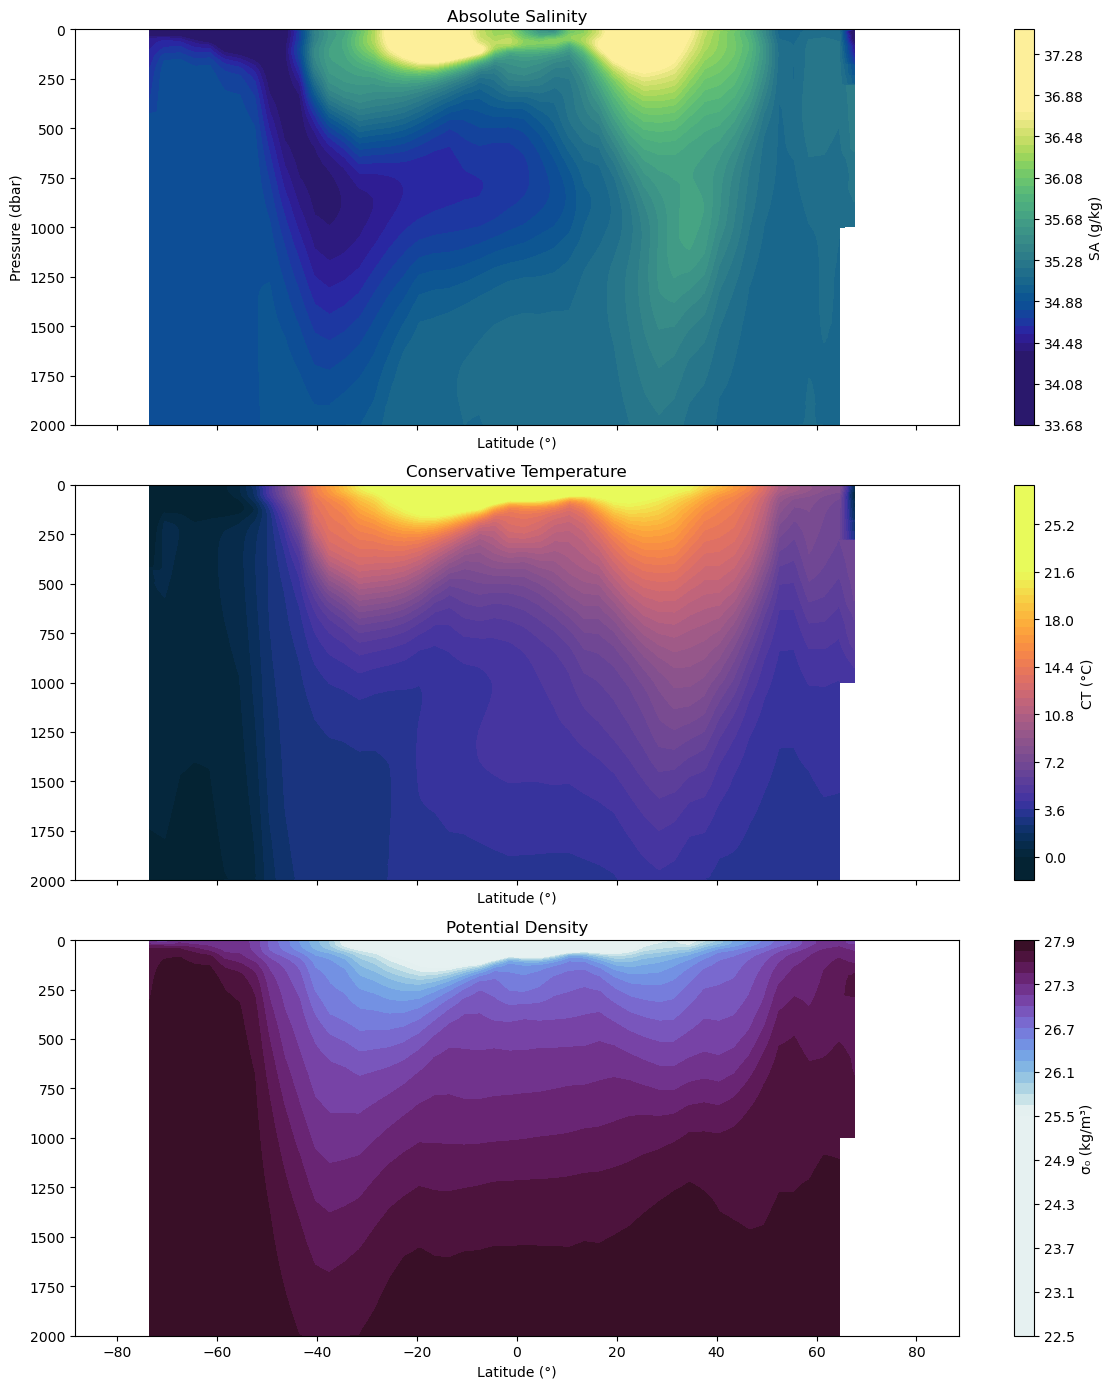

In [431]:
sa = np.array(atlantic_data.SA)
sig0 = np.array(atlantic_data.SIG0)
ct = np.array(atlantic_data.CT)

lat = np.array(atlantic_data.lat_c)
pres = np.array(atlantic_data.PRES_INTERPOLATED)


# Compute robust min/max (2nd to 98th percentile)
sa_vmin, sa_vmax = np.nanpercentile(sa, [2, 98])
sig0_vmin, sig0_vmax = np.nanpercentile(sig0, [2, 98])
ct_vmin, ct_vmax = np.nanpercentile(ct, [2, 98])

# Create plot
fig, axs = plt.subplots(3, 1, figsize=(12, 14), sharex=True)

cf1 = axs[0].contourf(lat, pres, sa, levels=50, cmap=cmo.haline, vmin=sa_vmin, vmax=sa_vmax)
axs[0].invert_yaxis()
axs[0].set_title("Absolute Salinity")
axs[0].set_xlabel("Latitude (°)")
axs[0].set_ylabel("Pressure (dbar)")
cbar1 = fig.colorbar(cf1, ax=axs[0])
cbar1.set_label("SA (g/kg)")

# Conservative Temperature
cf2 = axs[1].contourf(lat, pres, ct, levels=50, cmap=cmo.thermal, vmin=ct_vmin, vmax=ct_vmax)
axs[1].set_title("Conservative Temperature")
axs[1].invert_yaxis()
axs[1].set_xlabel("Latitude (°)")
cbar2 = fig.colorbar(cf2, ax=axs[1])
cbar2.set_label("CT (°C)")

# Potential Density
cf3 = axs[2].contourf(lat, pres, sig0, levels=50, cmap=cmo.dense, vmin=sig0_vmin, vmax=sig0_vmax)
axs[2].set_title("Potential Density")
axs[2].invert_yaxis()
axs[2].set_xlabel("Latitude (°)")
cbar3 = fig.colorbar(cf3, ax=axs[2])
cbar3.set_label("σ₀ (kg/m³)")

# Layout
plt.tight_layout()
plt.show()

In [ ]:
sig0 = np.array(sig0)

# Compute robust min/max (2nd to 98th percentile)
vmin = np.nanpercentile(sa, 2)
vmax = np.nanpercentile(sa, 98)

# Create plot
plt.figure(figsize=(15, 6))
cf = plt.contourf(lat, pres, sa, levels=20, cmap=cmo.haline, vmin=vmin, vmax=vmax)
plt.gca().invert_yaxis()  # So depth increases downward

# Add labels and colorbar
plt.xlabel("Latitude (°)")
plt.ylabel("Pressure (dbar)")
plt.title("Vertical Transect of Absolute Salinity at 30°W")
cbar = plt.colorbar(cf)
cbar.set_label("Absolute Salinity (g/kg)")

plt.grid(True)
plt.show()

In [401]:
%%time
atlantic_xsection = ds_globe_binned.sel(lon_c = -30, method = 'nearest')
plt.figure(figsize=(12,12))
atlantic_xsection.SA.plot(
    x = 'lat_c',
    y = 'PRES_INTERPOLATED',
    yincrease = False,
    cmap = cmo.haline,
    robust = True)

KeyboardInterrupt: 

<Figure size 1200x1200 with 0 Axes>

In [271]:
atlantic_xsection = ds_globe_binned.sel(lon_c = -30, method = 'nearest')
plt.figure(figsize=(12,6))
atlantic_xsection.CT.plot(
    x = 'lat_c',
    y = 'PRES_INTERPOLATED',
    yincrease = False,
    cmap = cmo.thermal,
    robust = True)

plt.title('Atlantic Temperature Section at 30°W')
plt.xlabel('Latitude (°)')
plt.ylabel('Pressure (dbar)')
plt.grid(True)
plt.show()

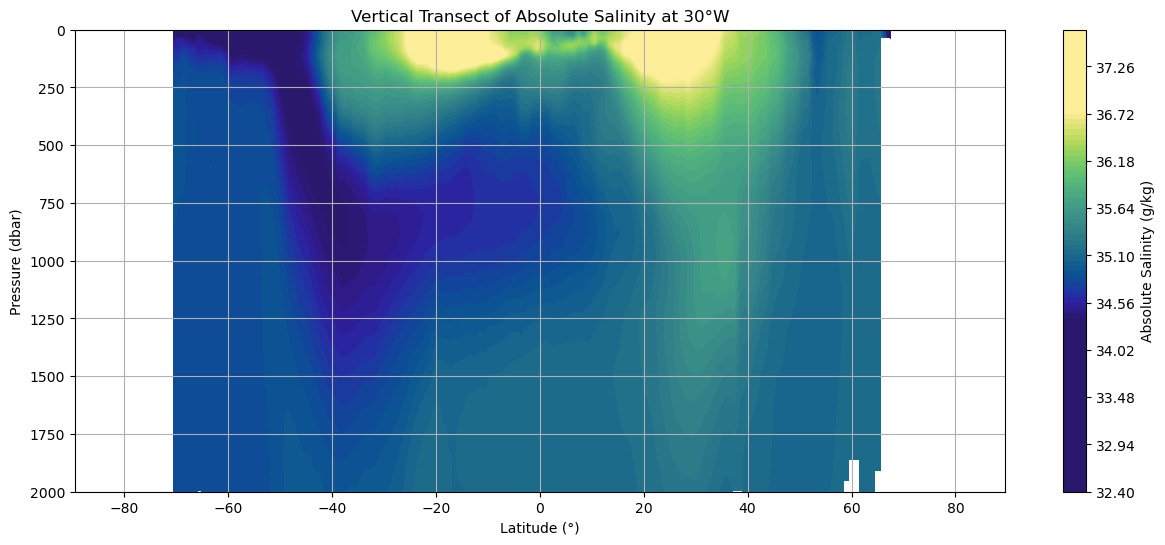

In [266]:
lat = atlantic_xsection.lat_c.values                # 1D latitude centers
pres = atlantic_xsection.PRES_INTERPOLATED.values   # 1D pressure levels
sa = atlantic_xsection.SA.values      # 2D: (pressure, latitude)

vmin = np.nanpercentile(sa, 2)
vmax = np.nanpercentile(sa, 98)


# Plot
plt.figure(figsize=(15, 6))
cf = plt.contourf(lat, pres, sa, levels=100, cmap=cmo.haline, vmin =vmin, vmax = vmax)
plt.gca().invert_yaxis()  # pressure increases downward

# Labels and colorbar
plt.xlabel("Latitude (°)")
plt.ylabel("Pressure (dbar)")
plt.title("Vertical Transect of Absolute Salinity at 30°W")
cbar = plt.colorbar(cf)
cbar.set_label("Absolute Salinity (g/kg)")

plt.grid(True)
plt.show()

In [269]:
%%time
pacific_xsection = ds_globe_binned.sel(lon_c = -150, method = 'nearest')
plt.figure(figsize=(12,6))
pacific_xsection.SA.plot(
    x = 'lat_c',
    y = 'PRES_INTERPOLATED',
    yincrease = False,
    cmap = cmo.haline,
    robust = True)

plt.title('Pacific Salinity Section at 120°W')
plt.xlabel('Latitude (°)')
plt.ylabel('Pressure (dbar)')
plt.grid(True)
plt.show()

CPU times: user 17min 30s, sys: 10min 45s, total: 28min 16s
Wall time: 1min 52s


In [231]:
d = 500
l = -59

In [233]:
#selecting depth to visualize
depth = ds_so_binned.sel(PRES_INTERPOLATED=d, method='nearest')

In [ ]:
%%time

fig = plt.figure(figsize=(20,12))

ax1 = plt.subplot(311, projection=ccrs.PlateCarree())
ax1.coastlines()
gl1 = ax1.gridlines(draw_labels=True)
depth.SIG0.plot(x='LONGITUDE',y='LATITUDE', transform=ccrs.PlateCarree(), ax=ax1, cmap=cmo.dense, robust=True)
ax1.axhline(l,color='k', lw=2)
ax1.set_title("Density at {}m".format(depth.PRES_INTERPOLATED.values))

ax2 = plt.subplot(312, projection=ccrs.PlateCarree())
ax2.coastlines()
gl2 = ax2.gridlines(draw_labels=True)
depth.CT.plot(x='LONGITUDE',y='LATITUDE', transform=ccrs.PlateCarree(), ax=ax2, cmap=cmo.thermal, vmin=-2, vmax=12)
ax2.axhline(l,color='k', lw=2)
ax2.set_title("Temperature at {}m".format(depth.PRES_INTERPOLATED.values))

ax3 = plt.subplot(313, projection=ccrs.PlateCarree())
ax3.coastlines()
gl3 = ax3.gridlines(draw_labels=True)
depth.SA.plot(x='LONGITUDE',y='LATITUDE', transform=ccrs.PlateCarree(), ax=ax3, cmap=cmo.haline, robust=True)
ax3.axhline(l,color='k', lw=2)
ax3.set_title("Salinity at {}m".format(depth.PRES_INTERPOLATED.values))

plt.subplots_adjust(hspace=0.3)

In [237]:
%%time

fig = plt.figure(figsize=(20,20))

ax1 = plt.subplot(221, projection=ccrs.SouthPolarStereo())
ax1.coastlines()
gl1 = ax1.gridlines(draw_labels=True)
depth.SIG0.plot(x='lon_c',y='lat_c', transform=ccrs.PlateCarree(), ax=ax1, cmap=cmo.dense, robust=True)
ax1.axhline(l,color='k')
ax1.set_title("Density at {}m".format(depth.PRES_INTERPOLATED.values))

ax2 = plt.subplot(223, projection=ccrs.SouthPolarStereo())
ax2.coastlines()
gl2 = ax2.gridlines(draw_labels=True)
depth.CT.plot(x='lon_c',y='lat_c', transform=ccrs.PlateCarree(), ax=ax2, cmap=cmo.thermal, vmin=-1, vmax=12)
ax2.axhline(l,color='k')
ax2.set_title("Temperature at {}m".format(depth.PRES_INTERPOLATED.values))

ax3 = plt.subplot(224, projection=ccrs.SouthPolarStereo())
ax3.coastlines()
gl3 = ax3.gridlines(draw_labels=True)
depth.SA.plot(x='lon_c',y='lat_c', transform=ccrs.PlateCarree(), ax=ax3, cmap=cmo.haline,  robust=True)
ax3.axhline(l,color='k')
ax3.set_title("Salinity at {}m".format(depth.PRES_INTERPOLATED.values))

plt.subplots_adjust(wspace=0.1, hspace=0.1)

CPU times: user 4min 26s, sys: 3min 38s, total: 8min 5s
Wall time: 1min 42s


In [43]:
#selecting latitude section to visualize
lat = ds_so_binned.sel(lat_c=l, method='nearest')

CPU times: user 1min 21s, sys: 1min 20s, total: 2min 42s
Wall time: 48.8 s


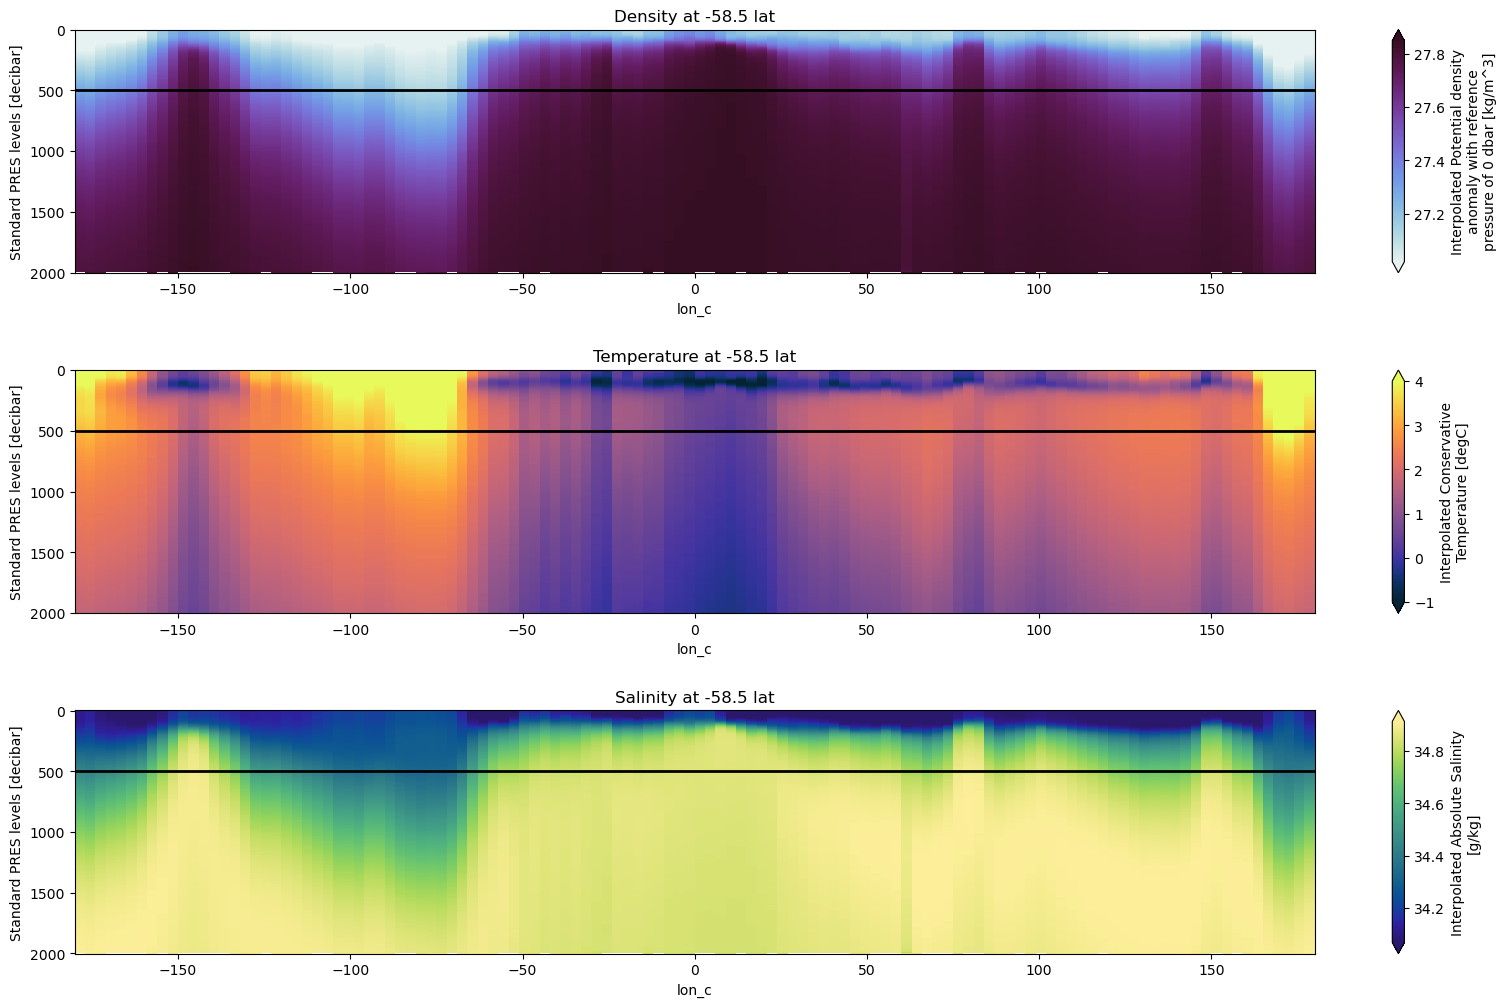

In [51]:
%%time

fig = plt.figure(figsize=(20,12))

ax1 = plt.subplot(311)
lat.SIG0.plot(x='lon_c',y='PRES_INTERPOLATED', ax=ax1, cmap=cmo.dense, robust=True)
ax1.axhline(d,color='k', lw=2)
ax1.invert_yaxis()
ax1.set_title("Density at {} lat".format(lat.lat_c.values))

ax2 = plt.subplot(312)
plot2 = lat.CT.plot(x='lon_c',y='PRES_INTERPOLATED', ax=ax2, cmap=cmo.thermal, vmin=-1, vmax=4)
ax2.axhline(d,color='k', lw=2)
ax2.invert_yaxis()
ax2.set_title("Temperature at {} lat".format(lat.lat_c.values))

ax3 = plt.subplot(313)
plot3 = lat.SA.plot(x='lon_c',y='PRES_INTERPOLATED', ax=ax3, cmap=cmo.haline, robust=True)
ax3.axhline(d,color='k', lw=2)
ax3.invert_yaxis()
ax3.set_title("Salinity at {} lat".format(lat.lat_c.values))

plt.subplots_adjust(hspace=0.4)